# Project description
- You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
> You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid plan brings in more revenue.
- Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

# Description of the Tariff plan:
We have 2 tarrif plan:
> Surf: 
1. Monthly charge: 20 'USD'
2. 500 monthly minutes, 50 texts, and 15 GB of data.
3. After exceeding the package limits:
-  1 minute: 3 cents
-  1 text message: 3 cents
-  1 GB of data: 10 'USD'
> Ultimate:
1. Monthly charge: 70 'USD'
2. 3000 monthly minutes, 1000 text messages, and 30 GB of data
3. After exceeding the package limits:
- minute: 1 cent
- text message: 1 cent
- GB of data: 7 'USD'

# Step 1. Open the data file and study the general information

In [2]:
# First we need to open all packages that we will work with 
from matplotlib import pyplot as plt
from math import factorial
from scipy.stats import norm
from scipy import stats as st
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
from nltk.stem import SnowballStemmer
from collections import Counter

In [3]:
#Let's load the first dataset to find out what kind of information we have there
users = pd.read_csv('megaline_users.csv')
users.info()
users.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
477,1477,Magaly,Rivas,52,"Riverside-San Bernardino-Ontario, CA MSA",2018-08-24,ultimate,NaN
404,1404,Paulita,Conley,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-16,surf,NaN
407,1407,Tristan,Daugherty,27,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,NaN
151,1151,Ralph,Monroe,21,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-03-20,surf,NaN
449,1449,Boyd,Kelley,39,"Seattle-Tacoma-Bellevue, WA MSA",2018-10-04,surf,NaN


- From this table we can see that we have all the primary information about our users, and at first look without analyzing we could say that we have some problems in the "churn_date" column. Let's go to the following dataset

In [4]:
#Second dataset
calls = pd.read_csv('megaline_calls.csv')
calls.info()
calls.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
37864,1141_1071,1141,2018-10-04,6.08
85589,1314_16,1314,2018-11-15,15.06
87358,1320_1027,1320,2018-08-17,0.94
84494,1311_337,1311,2018-09-09,0.00
88488,1324_542,1324,2018-10-14,6.82


- Here we see that we have the main information about our calls by each individual user. We will go to the next dataset, and check what we have there

In [5]:
#Third datasets
Internet = pd.read_csv('megaline_internet.csv')
Internet.info()
Internet.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
103020,1493_138,1493,2018-09-12,107.06
71632,1334_200,1334,2018-09-29,335.72
58022,1261_495,1261,2018-07-20,194.94
12821,1061_318,1061,2018-12-20,238.08
44649,1198_23,1198,2018-11-24,0.00


- This data is similar to call_data but Instead of information about calls we have information about internet traffic or how many "mb" are used by our users per session

In [6]:
#Four datasets
messages = pd.read_csv('megaline_messages.csv')
messages.info()
messages.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
11945,1079_344,1079,2018-10-13
23190,1140_12,1140,2018-08-23
15317,1101_374,1101,2018-07-25
21377,1132_689,1132,2018-06-25
63985,1408_110,1408,2018-09-24


- Here we see like in the previous two datasets, the primary information about messages activity by each unique user

In [7]:
# And last one  megaline_plans.csv
plan = pd.read_csv('megaline_plans.csv')
plan.info()
plan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


- In the last dataset, we see that we have a price current to each call_plan that we have, with limits on what we have for each type of operation (minutes duration, messages amount, internet gigabytes) and additional price if the user reaches out those limits

> Now when we load all our datasets we can start working with them. Let's move on to the next step.

# Step 2. Prepare the data
> 2.1
- First we will Convert the data to the necessary types
- Then we need to find and eliminate errors in the data

> In this step, I propose to work with all datasets but we will not touch our plan table, because this table will be useful for us like an information table for our next step, we will not merge it or provide her some calculations or functions. And from the previous stage what we see this table doesnt take a lot of memory space just 256 bytes its nothing compare to another dataset

In [8]:
#First we will work with "users" datasets, check what data type we have and what we can do with them 
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


- This dataset takes not a big amount of memory, but for the further move we need to convert our "object" type to "string" and "int64" to "int16"

In [9]:
# Our Functions for changing the type of columns
columns = ['user_id','age']
column = ['first_name','last_name', 'city', 'plan']
def convert_to_int(data,columns):
    for col in columns:
        data[col] = data[col].astype('int16')
    return data


def convert_to(data,column):
    for col in column:
        data[col] = data[col].astype('string')
    return data

users = (
    users
    .pipe(convert_to_int, columns)
    .pipe(convert_to, column)
)
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d %H:%M')# Method for converting object type date type

users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int16         
 1   first_name  500 non-null    string        
 2   last_name   500 non-null    string        
 3   age         500 non-null    int16         
 4   city        500 non-null    string        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    string        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int16(2), object(1), string(4)
memory usage: 25.5+ KB


- Now, let's check what kind of problems we have in our "users" datasets. First will check in what column we have missing values, then will think about how we can refill them. We know from our project task that if in the "churn_date " column we have missing values its means that our user still using this calling plan. 

In [10]:
#Method for detecting missing values and calculating how many of them we have in each column
users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

- Seems we have only a missing value in the "churn_date" column but we know that if in the "churn_date" column we have missing values its means that our user still using this calling plan. That is why I propose to refill this column in another way, with a "1" value which will mean that user continues using the calling plan, and a "0" if the user stopped using the service, in further it will help us provide the necessary information about how many users left first or second plan and how many continue using them.

In [11]:
#Filling all missing values by "1"
users['churn_date'] = users['churn_date'].fillna(1)
users.isnull().sum()

user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
dtype: int64

In [12]:
#Replacing all values in our "churn_date" wich not equal to "1" by "0"
users.loc[(users['churn_date'] != 1), 'churn_date'] = 0
users['churn_date'].unique()

array([1, 0], dtype=object)

- Let's work with the last column where we can find a mess and move on to another dataset. In my opinion, another and the last column in our table which can clearly show us the wrong direction in our conclusion it's the "Age" column. We will use describe method in this column to take from it the main information 

In [13]:
users['age'].describe()

count    500.000000
mean      45.486000
std       16.972269
min       18.000000
25%       30.000000
50%       46.000000
75%       61.000000
max       75.000000
Name: age, dtype: float64

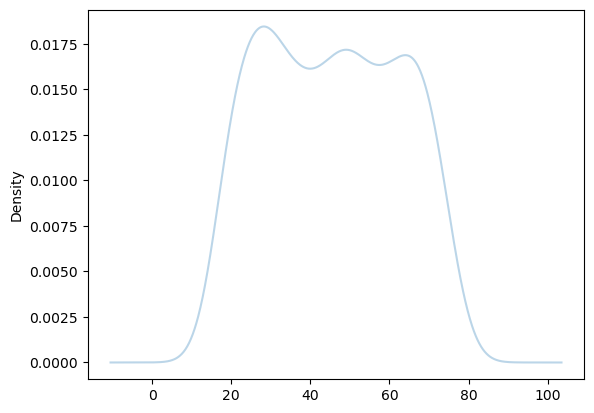

In [14]:
#let's build a distribution density graph to determine how the age of our users is distributed
users['age'].plot.kde(alpha=0.3);


- By our density graph, we can see that if we will take a random user the age of him will be in the range of 30-60. Now we can move on to another dataset and check what we have there

In [15]:
#See if we have any missing values
calls.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

Seems our dataset is clear from missing values let's check what data type our column has and retyping if its will need

In [16]:
calls.info()
calls.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
13506,1057_385,1057,2018-12-09,6.05
37982,1142_151,1142,2018-12-25,5.97
136325,1494_167,1494,2018-08-12,0.00
114945,1403_19,1403,2018-11-09,0.00
25796,1099_116,1099,2018-10-13,2.71


- Let's change our object type to string, and by our project task we need to round all calls to minute, even if the call lasted just one second

In [17]:
#Rounding  up duration minutes like it's said in the project description
calls['duration'] = calls['duration'].apply(np.ceil)
calls.sample(3)

,id,user_id,call_date,duration
22620,1082_713,1082,2018-08-30,0.0
7068,1033_84,1033,2018-10-21,11.0
35951,1136_121,1136,2018-12-06,8.0


In [18]:
#Now we can change types of our column by that what we need to feel a bit of memory
columns = ['user_id','duration']
calls = convert_to_int(calls,columns)

In [19]:
calls['id'] = calls['id'].astype('string')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d %H:%M')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  string        
 1   user_id    137735 non-null  int16         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int16         
dtypes: datetime64[ns](1), int16(2), string(1)
memory usage: 2.6 MB


- Here we see that we freed a good amount of memory from 4.2+MB to 2.6MB, now when we finished all preprocessing  we can go and check another dataset

In [20]:
#Now we will work with dataset "Internet"
Internet.info()
Internet.sample(5)
Internet.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

- Seems we have a clear dataset, first, let's round up our internet traffic as we did with calls, and after will continue to go further

In [21]:
#Round "up" our values
Internet['mb_used'] = Internet['mb_used'].apply(np.ceil)
Internet.sample(5)

,id,user_id,session_date,mb_used
7238,1041_78,1041,2018-10-23,224.0
31423,1144_135,1144,2018-08-11,0.0
81589,1382_202,1382,2018-08-10,678.0
699,1004_350,1004,2018-09-14,230.0
37338,1167_261,1167,2018-07-14,24.0


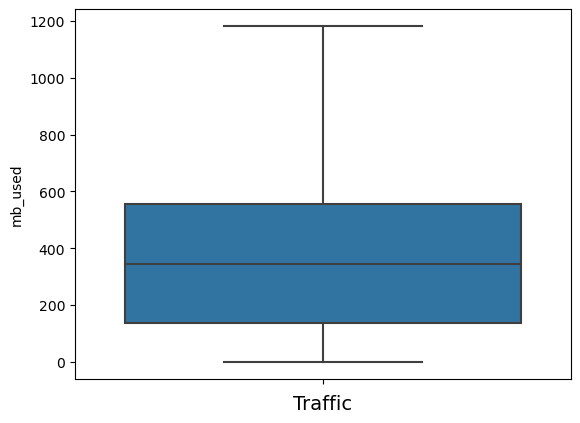

In [22]:
#let's create a boxplot and find  what megabytes distribution do  we have
sns.boxplot(y="mb_used", data=Internet,showfliers=False)
plt.xlabel('Traffic', fontsize=14)
plt.show()

 - Seems we have a bit of an outlier but our goal now is to check all data for problematic values like missing and max, and min, and merge our datasets. But first, let's do first

In [23]:
#Takes all main parameters from our table
Internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,367.142876
std,142.053913,277.256974
min,1000.000000,0.000000
25%,1122.000000,137.000000
50%,1236.000000,344.000000
75%,1367.000000,555.000000
max,1499.000000,1694.000000


In [24]:
#Changin type of a column in the "Internet" dataset and taking main parameters from our table
Internet['id'] = Internet['id'].astype('string')
Internet['session_date'] = pd.to_datetime(Internet['session_date'], format='%Y-%m-%d %H:%M')

columns = ['user_id','mb_used']
Internet = convert_to_int(Internet,columns)
Internet.info()
Internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  string        
 1   user_id       104825 non-null  int16         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  int16         
dtypes: datetime64[ns](1), int16(2), string(1)
memory usage: 2.0 MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,367.142876
std,142.053913,277.256974
min,1000.000000,0.000000
25%,1122.000000,137.000000
50%,1236.000000,344.000000
75%,1367.000000,555.000000
max,1499.000000,1694.000000


- Now that we are sure that, that all our work was done well, let's move to our last dataset

In [25]:
#Gaining main information from our "messages" datasets
messages.info()
messages.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
26737,1163_17,1163,2018-11-16
64353,1409_98,1409,2018-12-25
18923,1122_152,1122,2018-05-27
67855,1439_249,1439,2018-08-28
51324,1334_42,1334,2018-05-28


In [26]:
#Searching for missing values
messages.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [27]:
#changing our datatype
messages['id'] = messages['id'].astype('string')
messages['user_id'] = messages['user_id'].astype('int16')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d %H:%M')
messages.sample(5)

,id,user_id,message_date
66131,1433_71,1433,2018-10-31
11044,1077_315,1077,2018-10-16
63465,1405_126,1405,2018-12-08
1038,1011_1,1011,2018-12-14
9395,1069_343,1069,2018-09-22


> 2.2 After we made all processing we can finally come to the next step to finding the  main goals, For each user we need to find:
- The number of calls made and minutes used per month
- The number of text messages sent per month
- The volume of data per month
- The monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)


>2.2.1. Lets find out the number of calls made and minutes used per month
- For this we will divide our date into months and create a new column, this will make our life easier and help us work with our data

In [28]:
#Using function assign to create a new column with our data by dt."" methods
calls_upd = calls.assign(weekday = lambda x: x['call_date'].dt.weekday,# Finding the week days by our "date_posted" column
                         month = lambda x: x['call_date'].dt.month,# Finding the month by our "date_posted" column
                         year = lambda x: x['call_date'].dt.year# Finding the week days by our "date_posted" column
                         )
calls_upd.sample(5)

,id,user_id,call_date,duration,weekday,month,year
133455,1483_273,1483,2018-07-24,10,1,7,2018
95926,1340_276,1340,2018-09-24,1,0,9,2018
93807,1335_35,1335,2018-09-29,6,5,9,2018
82932,1299_590,1299,2018-11-19,9,0,11,2018
40594,1150_96,1150,2018-11-30,7,4,11,2018


- Now we can start working by each user,  grouping by each user how many times they called and for how long by each month

In [29]:
#Creating a new table that will show us how many times each unique user made  a call and for how long per each month
calls_per_month = (
    calls_upd
    .groupby(['user_id','month']).agg
        ({'id':'count',
         'duration':'sum'})
)
calls_per_month = pd.DataFrame(calls_per_month )
calls_per_month = calls_per_month.reset_index()
calls_per_month = calls_per_month.rename(columns = {'id':'total_calls',
                                                   'duration':'total_duration'})
calls_per_month.head(5)

,user_id,month,total_calls,total_duration
0,1000,12,16,124
1,1001,8,27,182
2,1001,9,49,315
3,1001,10,65,393
4,1001,11,64,426


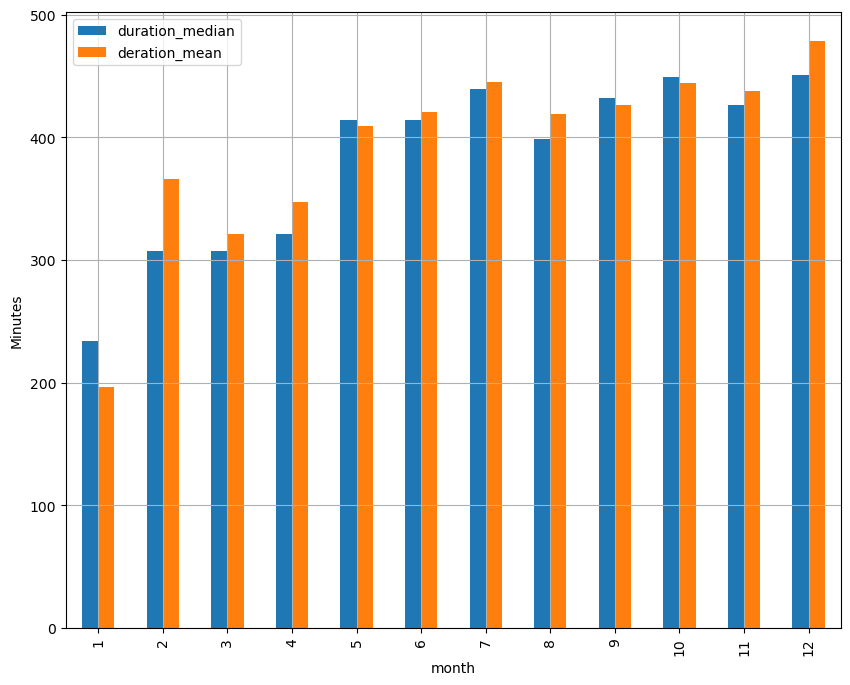

In [30]:
#Showing  a graph that will show us duration call distribution by each month 

calls_per_month.groupby(['month']).agg(duration_median=('total_duration','median'),
                                       deration_mean=('total_duration','mean')).plot.bar(figsize=(10,8),grid=True)
plt.ylabel('Minutes');                                    

- By this graph we see that our "means" and "median" values don't have big differences from each other,   this is why we can come to the conclusion that we don't have big numbers of "outliers" in our datasets. Let's move on to the next step

>  Now let's find out the number of text messages sent per month, for this task we will work with the "messages" dataset, will work as we did with previous datasets, create a new column "month" and will group by month and by unique id_user and count how many messages they sent per month  

In [31]:
#Using function assign to create a new column with our data by dt."" methods
messages_upd = messages.assign(month = lambda x: x['message_date'].dt.month) 
#Creating a new table that will show us how many times each unique user sent messages per month
mess_per_month = messages_upd[['user_id','month']].value_counts(normalize=False).reset_index().rename(columns={0:'total_messages'})
mess_per_month

,user_id,month,total_messages
0,1052,12,266
1,1381,10,224
2,1381,11,180
3,1328,12,168
4,1132,11,166
...,...,...,...
1801,1123,6,1
1802,1263,12,1
1803,1484,11,1
1804,1263,11,1


In [32]:
#Let's find out in what month we have the biggest number of messages sent by our users
pivot_1 = mess_per_month.pivot_table(index='month', values='total_messages',aggfunc=['median','mean','min','max'])
cm = sns.light_palette("green", as_cmap=True)
pivot_1.style.background_gradient(cmap=cm)


,median,mean,min,max
,total_messages,total_messages,total_messages,total_messages
month,,,,
1,22.000000,20.750000,2,37
2,15.000000,23.545455,3,67
3,21.000000,25.826087,1,72
4,19.500000,25.634615,1,120
5,27.000000,36.103896,1,149
6,28.000000,34.531532,1,143
7,30.000000,37.739130,1,164
8,35.000000,40.850829,1,156


- In December we have a lot of holidays and most of the ppl can be on their vacation. That is probably the reason we see a bigger number of messages in that month. Let's move to another part of our task.

> We need to find out in what month the people prefer to spend the most time on the internet: watching some video, listening to music, playing games, spending time on social media, etc.

In [33]:
Internet_upd = Internet.assign(month = lambda x: x['session_date'].dt.month)# Add month collumn 
Internet_total = Internet_upd.groupby(['user_id','month'])['mb_used'].agg('sum').reset_index().rename(columns={'mb_used':'traffic'})
Internet_total['traffic'] = (Internet_total['traffic']/1024).apply(np.ceil) #convert monthly mb to gb and round them up
Internet_total.sample(5)

,user_id,month,traffic
1960,1419,11,6.0
1324,1283,11,4.0
1782,1385,7,18.0
2216,1488,10,23.0
372,1078,11,9.0


In [34]:
#Showing monthly traffic distribution by pivot table 
pivot_2 = Internet_total.pivot_table(index='month', values='traffic',aggfunc=['median','mean','min','max'])
cm = sns.light_palette("red", as_cmap=True)
pivot_2.style.background_gradient(cmap=cm)

,median,mean,min,max
,traffic,traffic,traffic,traffic
month,,,,
1,7.500000,6.500000,2.000000,11.000000
2,16.000000,14.437500,1.000000,22.000000
3,16.000000,15.228571,2.000000,36.000000
4,14.000000,13.628571,1.000000,37.000000
5,15.000000,15.009524,1.000000,36.000000
6,16.000000,15.697183,1.000000,38.000000
7,16.000000,16.865922,1.000000,39.000000
8,18.000000,17.421739,1.000000,51.000000


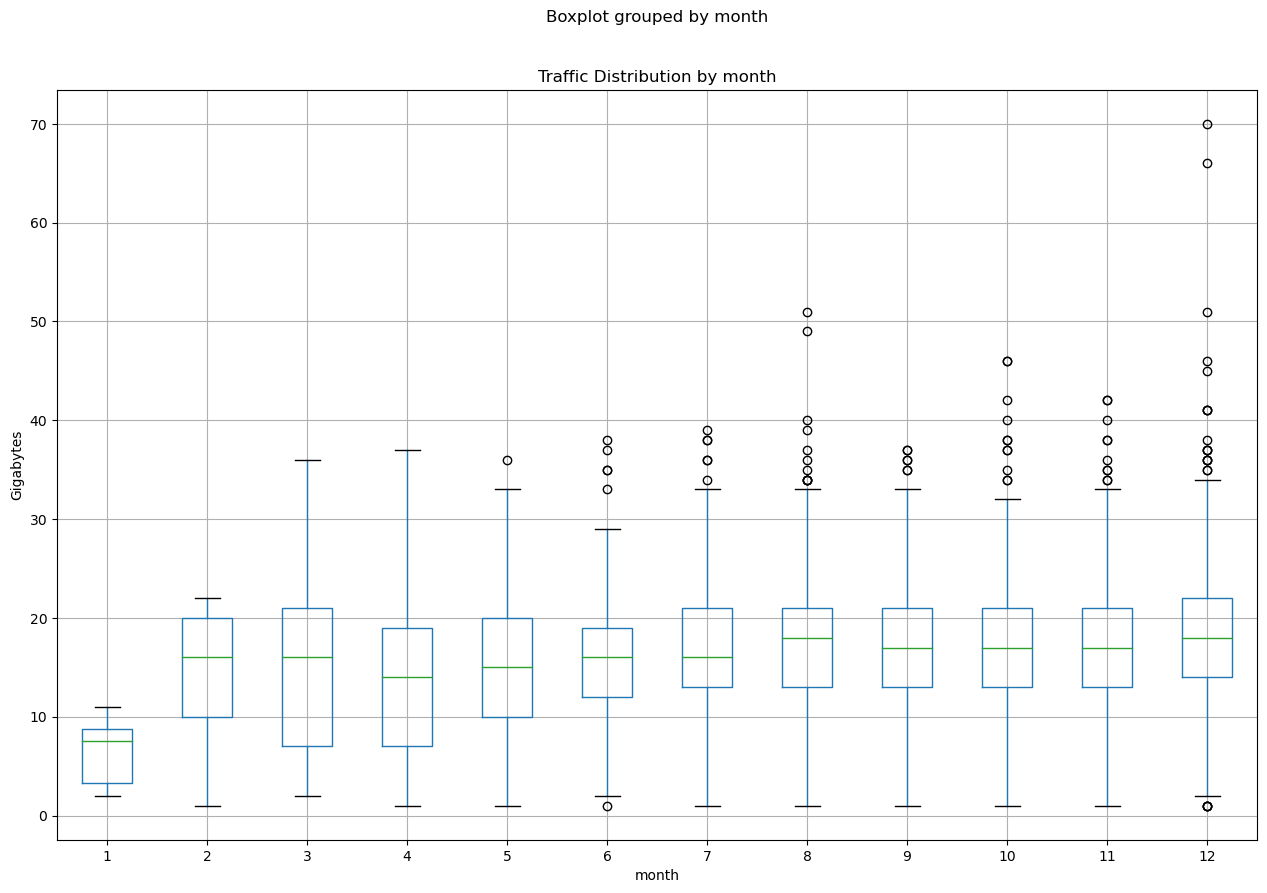

In [35]:
#Creating a boxplot of GB distribution grouping by month  
Internet_total.boxplot(column='traffic',by='month',figsize=(15,10))
plt.title('Traffic Distribution by month')
plt.ylabel('Gigabytes');

- Here we can see that our users starting from the second month till twelve have likely equal megabytes usage per month, it's understandable Internet nowadays part of our common life and seems the amount of traffic is growing by each year 

>  Now when we calculate all information about our data per month  we can use the merge method to add our three tables to the main "users" table, and making one table 

In [36]:
#Creating a new table with name "main_data_final"
main = calls_per_month.merge(mess_per_month, on=['user_id','month'], how='outer')
main_data = main.merge(Internet_total, on=['user_id','month'], how='outer')
main_data_final = main_data.merge(users, on=['user_id'], how='left')
main_data_final.drop(columns=['first_name','last_name', 'age','reg_date','churn_date'], inplace=True)
main_data_final.sample(5)

,user_id,month,total_calls,total_duration,total_messages,traffic,city,plan
2292,1311,6,NaN,NaN,NaN,2.0,"Memphis, TN-MS-AR MSA",ultimate
2168,1478,9,61.0,445.0,17.0,19.0,"Portland-Vancouver-Hillsboro, OR-WA MSA",ultimate
1640,1361,11,57.0,379.0,37.0,20.0,"Birmingham-Hoover, AL MSA",surf
713,1155,2,11.0,90.0,8.0,5.0,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",ultimate
119,1032,12,92.0,761.0,20.0,14.0,"Birmingham-Hoover, AL MSA",ultimate


In [37]:
# Finding the missing values
main_data_final.isnull().sum()

user_id             0
month               0
total_calls        35
total_duration     35
total_messages    487
traffic            16
city                0
plan                0
dtype: int64

> Conclusion:  Now when we finish processing and analyzing our datasets and merge them all by one, we can go to the next step and make some analyzing what we have in our project task. But first, we need to check if we have any missing values because we see that we have from our project info that we have 500 users, and in some tables we see that number of rows in one dataset can be less or more than in another  its mean we have users who didn't send a message or didn't use internet  or in another hand only use the internet and didn't send a message or didn't calling, that why I propose to fill all values by 0 which will represent that user didn't use this function from "call plan"

In [38]:
#refill all missing values by 
main_data_final = main_data_final.fillna(0)
main_data_final.isnull().sum()

user_id           0
month             0
total_calls       0
total_duration    0
total_messages    0
traffic           0
city              0
plan              0
dtype: int64

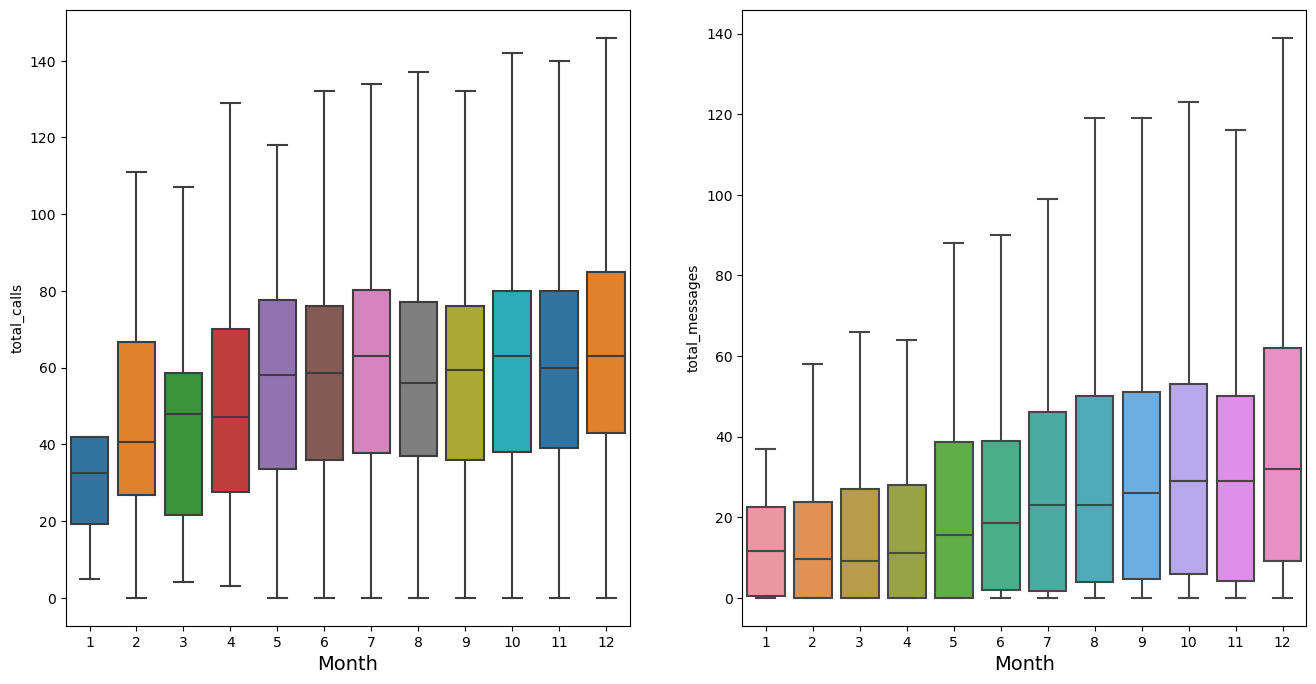

In [39]:
# Showing how our amounts of calls and messages amount distributed by each month in our main dataset
fig, axs = plt.subplots(1, 2, figsize=(16,8) )
sns.boxplot(data=main_data_final, x="month", y="total_calls",  palette='tab10', showfliers=False, ax=axs[0])
axs[0].set_xlabel('Month', fontsize=14)
sns.boxplot(x="month", y="total_messages", data=main_data_final, showfliers=False,ax=axs[1])
axs[1].set_xlabel('Month', fontsize=14)
plt.show()

> Conclusion: In the first boxplot, we can clearly say that ppl who bought their package at the beginning of the year used data from tarrife package the lowest than at the end of the year but the biggest amount of calls can see in "July",  in the second boxplot, we can see that the biggest number of the message belong to December. But after analyzing two boxplots together we can say that our month with a bigger number of calling and messages is "December" and the less number of messages and calls belong to "January".

> 2.2.3 Now we can start another step of our work and find the monthly revenue from each user. In this stage, we will work with  tariff plans:
- We will add a new column depending on the tariff plan that the user use
- Then we will subtract the free package limit from the total number of calls, text messages, and data;
- At last, we will multiply all our minutes, gb, and messages which stay beyond the limit line on their  value depending on which tariffs plan belongs user

In [40]:
#Function that will add a new column with tariff price depends on which tariff user useing 
def add_price(row):
    tarrife = row['plan']
    if  tarrife == 'surf':
        return 20
    return 70

In [41]:
#applying our function to our datasets
main_data_final['tariffe_price'] = main_data_final.apply(add_price, axis=1)
main_data_final.sample(5)

,user_id,month,total_calls,total_duration,total_messages,traffic,city,plan,tariffe_price
2108,1466,7,24.0,128.0,40.0,20.0,"Los Angeles-Long Beach-Anaheim, CA MSA",surf,20
78,1022,8,80.0,631.0,0.0,21.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,20
672,1145,10,54.0,343.0,71.0,24.0,"San Jose-Sunnyvale-Santa Clara, CA MSA",surf,20
706,1153,9,72.0,582.0,0.0,19.0,"Bridgeport-Stamford-Norwalk, CT MSA",surf,20
114,1031,9,76.0,515.0,3.0,13.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate,70


In [42]:
#Now we need create a boolean values which we will need to use in the next step
limit_gb_20 = round(plan['mb_per_month_included'][0] / 1024) #Convert month mb limit to gb limit 
limit_minutes_20 = plan['minutes_included'][0]
limit_messages_20 = plan['messages_included'][0]
limit_gb_70 = round(plan['mb_per_month_included'][1] / 1024) #Convert month mb limit to gb limit 
limit_minutes_70 = plan['minutes_included'][1]
limit_messages_70 = plan['messages_included'][1]
add_cost_min_20 = plan['usd_per_minute'][0]
add_cost_gb_20 = plan['usd_per_gb'][0]   
add_cost_mes_20 = plan['usd_per_message'][0]
add_cost_min_70 = plan['usd_per_minute'][1]
add_cost_gb_70 = plan['usd_per_gb'][1] 
add_cost_mes_70 = plan['usd_per_message'][1]

- Now we can subtract the free package limit from the total number of calls, text messages, and data per month, for this step, we will create a functions that will help us to solve this task

In [43]:
#Function which will provide to us information if the user spoke more min than he can in tariff plan per month
def upper_lim_min(row):
    plan = row['plan']
    call = row['total_duration']
    if (call > limit_minutes_20 ) and (plan == "surf"):
        return call - limit_minutes_20 
    elif (call > limit_minutes_70) and (plan == "ultimate"):
        return call - limit_minutes_70
    return 0

#Function which will provide to us information if the user send more message than he can in tariff plan per month
def upper_lim_mess(row):
    plan = row['plan']
    mess = row['total_messages']
    if (mess > limit_messages_20) and (plan == "surf"):
        return mess - limit_messages_20
    elif (mess > limit_messages_70) and (plan == "ultimate"):
        return mess - limit_messages_70
    return 0 

#Function which will provide to us information if the user used more megabytes than he can in tariff plan per month 
def upper_lim_mb(row):
    plan = row['plan']
    gb = row['traffic']
    if (gb > limit_gb_20) and (plan == "surf"):
        return gb - limit_gb_20
    elif (gb > limit_gb_70) and (plan == "ultimate"):
        return gb - limit_gb_70
    return 0

# We return "0" if our values do not meet the specified conditions of the function


In [44]:
#apply our function to datasets
main_data_final['add_min'] = main_data_final.apply(upper_lim_min, axis=1)
main_data_final['add_mess'] = main_data_final.apply(upper_lim_mess, axis=1)
main_data_final['add_gb'] = main_data_final.apply(upper_lim_mb, axis=1)
main_data_final.sample(5)

,user_id,month,total_calls,total_duration,total_messages,traffic,city,plan,tariffe_price,add_min,add_mess,add_gb
670,1145,8,46.0,311.0,75.0,17.0,"San Jose-Sunnyvale-Santa Clara, CA MSA",surf,20,0.0,25.0,2.0
282,1062,10,36.0,310.0,8.0,17.0,"San Antonio-New Braunfels, TX MSA",ultimate,70,0.0,0.0,0.0
1212,1261,6,61.0,441.0,52.0,13.0,"Kansas City, MO-KS MSA",surf,20,0.0,2.0,0.0
1492,1331,10,44.0,299.0,85.0,16.0,"Dallas-Fort Worth-Arlington, TX MSA",surf,20,0.0,35.0,1.0
458,1099,5,78.0,512.0,25.0,21.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,20,12.0,0.0,6.0


- After we calculated all the needed information we can multiply all upper_limite values by their price depending on the Tariff plan then add to the cost of Tariff and finally find out the  revenue from each user 

In [45]:
#Function for calculation of total revenue from each user
def total_price(row):
    plan = row['plan']
    gb = row['add_gb']
    minut = row['add_min']
    mess = row['add_mess']
    if plan == "surf":
        return (gb * add_cost_gb_20  + minut * add_cost_min_20 + mess * add_cost_mes_20 + 20)
    elif plan == "ultimate":
        return (gb * add_cost_gb_70  + minut * add_cost_min_70 + mess * add_cost_mes_70 + 70)

In [46]:
#Applying our function and creating a new column with total_revenue value from each user
main_data_final['total_price'] =  main_data_final.apply(total_price, axis=1)
main_data_final[['user_id','total_price']].sample(5)

,user_id,total_price
499,1107,70.00
43,1010,43.03
238,1055,21.35
1194,1258,50.15
642,1140,119.12


In [47]:
# For further analysis, I propose cleaning up our data and creating a new table with columns that we will need for further
new_data = main_data_final[['user_id','city','month','plan','total_calls','total_duration','total_messages','traffic','total_price']]
new_data.sample(5)

,user_id,city,month,plan,total_calls,total_duration,total_messages,traffic,total_price
2271,1137,"Chicago-Naperville-Elgin, IL-IN-WI MSA",12,surf,0.0,0.0,56.0,7.0,20.18
1976,1433,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",11,ultimate,86.0,591.0,123.0,24.0,70.00
225,1054,"Phoenix-Mesa-Chandler, AZ MSA",6,surf,32.0,211.0,24.0,21.0,80.00
394,1082,"Memphis, TN-MS-AR MSA",9,surf,86.0,617.0,34.0,14.0,23.51
84,1023,"Omaha-Council Bluffs, NE-IA MSA",8,surf,11.0,72.0,6.0,10.0,20.00


In [48]:
#Let's takes main information (distribution) from total_price column and than add some vizualization
new_data['total_price'].describe()

count    2293.000000
mean       64.418308
std        46.679924
min        20.000000
25%        23.480000
50%        70.000000
75%        70.000000
max       590.370000
Name: total_price, dtype: float64

- From the previous table, we can see that most of our users give revenue to the  Operator in the range of 23 to 70 USD. I propose adding some visualization to find out what month's revenue distribution we have 

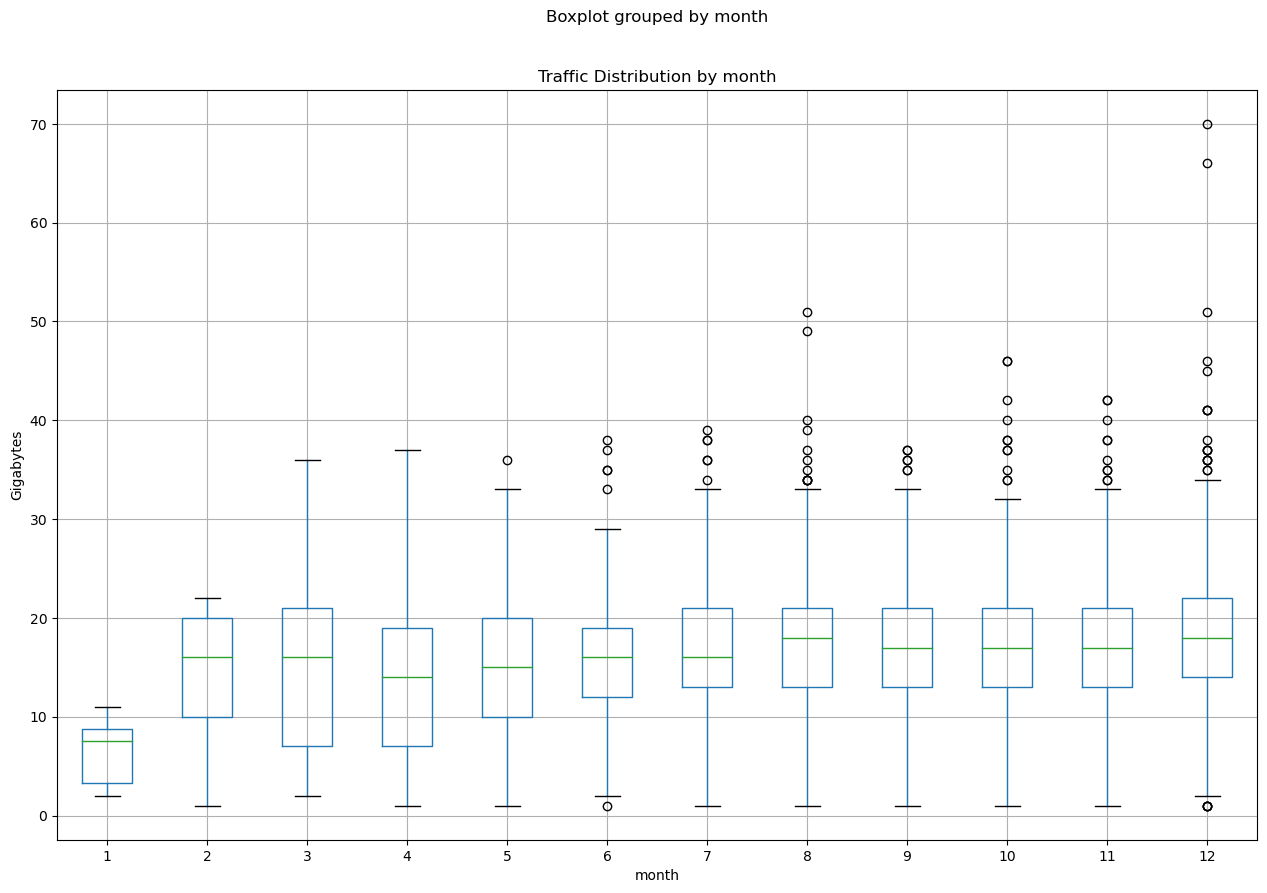

In [49]:
#Creating a boxplot of GB distribution grouping by month  
Internet_total.boxplot(column='traffic',by='month',figsize=(15,10))
plt.title('Traffic Distribution by month')
plt.ylabel('Gigabytes');

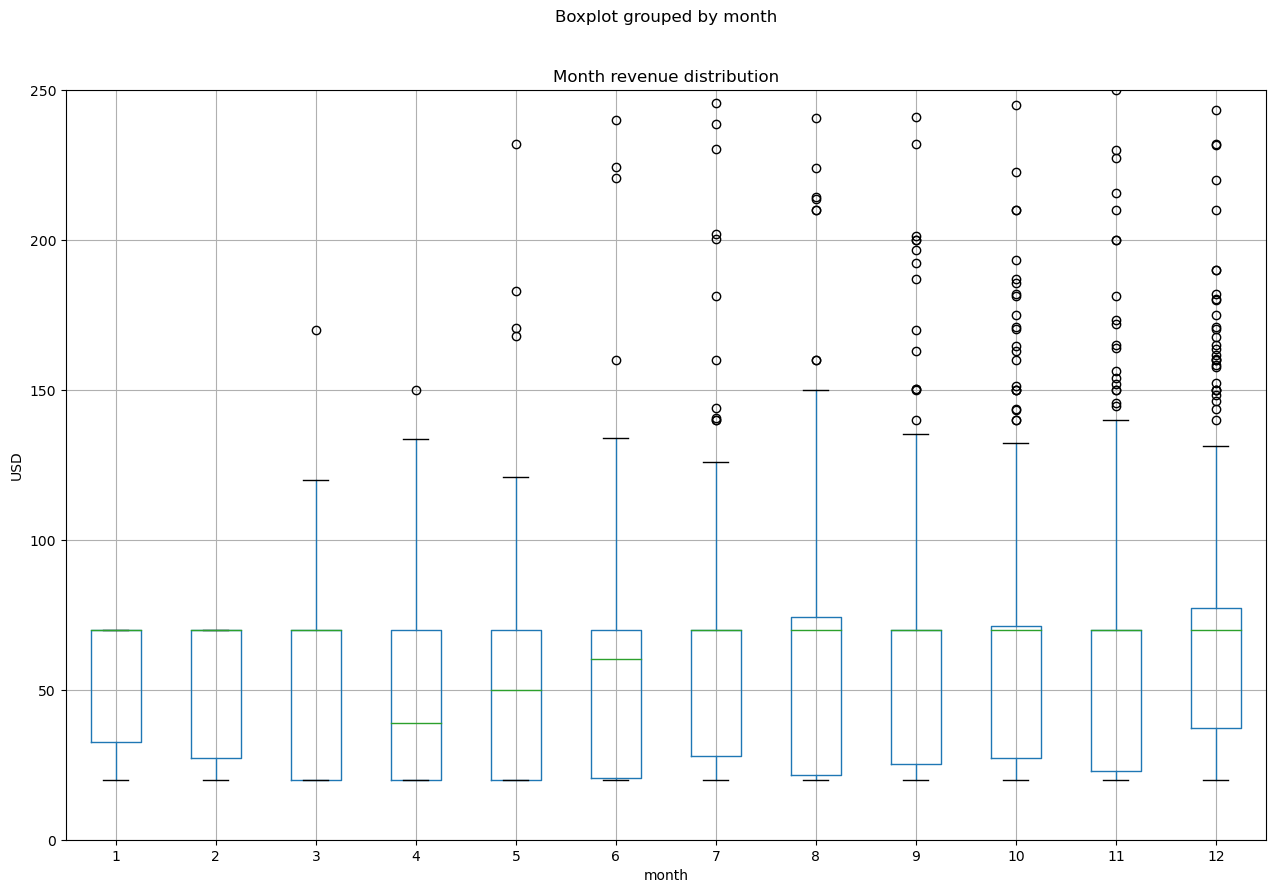

In [50]:
new_data.boxplot(column='total_price',by='month',figsize=(15,10))
plt.ylim(0,250)
plt.title('Month revenue distribution')
plt.ylabel('USD');

> Conclusion: By this boxplot, we can't clearly say in what month we can have bigger or less revenue because we have outliers and they provide a big influence on our analysis, but on the first look we can say that in "August" and "April" we have the biggest number of revenue. After we solved all our goals and find what the monthly revenue from each user we can move on to the next step.

# Step 3. Analyze the data
- Describe the customers' behavior. 
- Find the minutes, texts, and volume of data the users of each plan require per month. 
- Calculate the mean, variance, and standard deviation. Plot histograms. Describe the distributions.

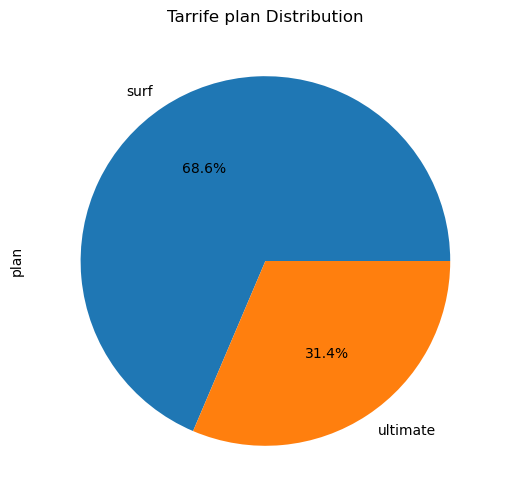

In [51]:
#First, let's find to what tariff plan belongs to most users to this task we will create a pie plot 
new_data['plan'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(6,6), title= "Tarrife plan Distribution");

> Conclusion: From this graph, we can clearly say that most of our users (2/3)  have a surf tariff plan. In the previous task we did find in what month and what kind of operation ppl prefer to do, are they calling or sending messages or sitting on the Internet? That's why we will not do the same work. But I propose adding one more operation and showing what type of operation and how it gives impact to another one. For example, users who prefer the longest call don't like to send messages, or users who prefer to sit on the Internet don't like to call.

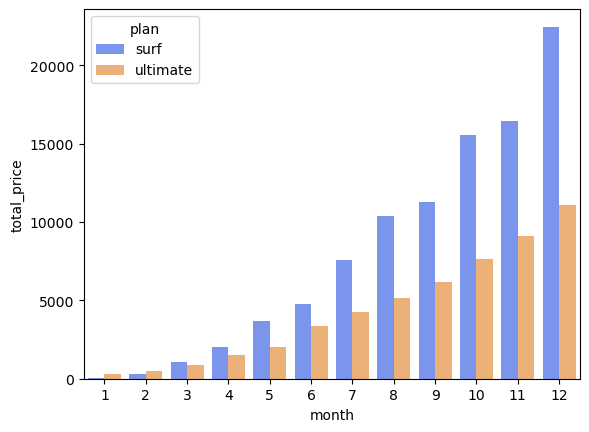

In [52]:
#Let's add some vizualization to show total monthly revenue for each tariff plan
rev_plan = new_data.groupby(['month','plan'])['total_price'].sum().reset_index()
sns.barplot(data=rev_plan, x='month', y='total_price', hue='plan', palette='bright', alpha=0.6);


In [53]:
#Calculating correlation between our main parameters
new_data[['total_duration','total_calls','total_messages','total_price','traffic']].corr()

,total_duration,total_calls,total_messages,total_price,traffic
total_duration,1.000000,0.981558,0.241799,0.223108,0.320801
total_calls,0.981558,1.000000,0.242459,0.231791,0.330320
total_messages,0.241799,0.242459,1.000000,0.157781,0.219202
total_price,0.223108,0.231791,0.157781,1.000000,0.779095
traffic,0.320801,0.330320,0.219202,0.779095,1.000000


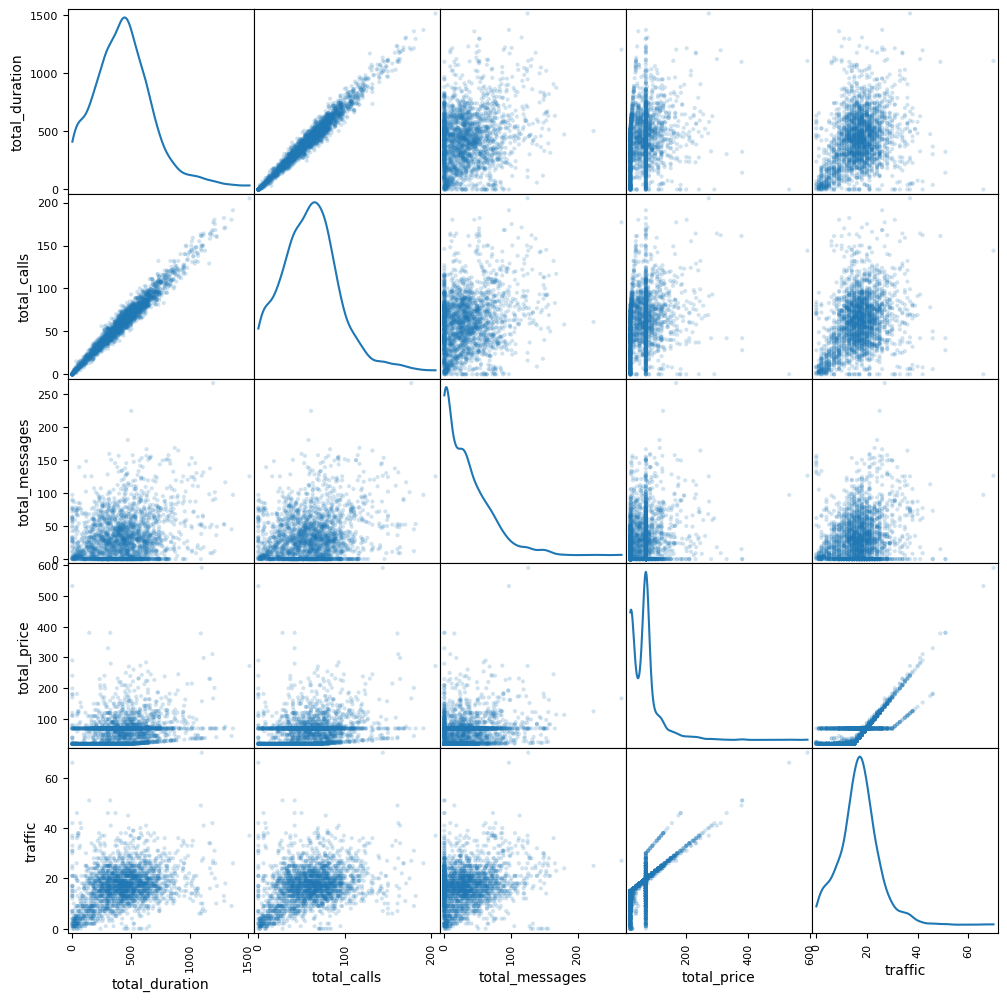

In [54]:
#And add vizualition to our last table
pd.plotting.scatter_matrix(new_data[['total_duration','total_calls','total_messages','total_price','traffic']], alpha=0.2, figsize=(12, 12), diagonal="kde");

> Conclusion: Here we can say that users who like often to call prefer to have the longest conversation by the telephone and in another way,  we cannot say that we can clearly see any correlation between one or another type of operation, like sending messages and calling,  or calling duration and using the Internet. And for price correlation what we see is that amount of used data by users doesn't depend on the price they paid.

- Now we can go to the next step and will find out the number of minutes, texts, and volume of data the users of each plan require per month.

In [55]:
#Describing main parameters of our table
new_data.describe()

,user_id,month,total_calls,total_duration,total_messages,traffic,total_price
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,1246.075883,9.172700,60.067597,429.283471,33.166594,16.888792,64.418308
std,143.051927,2.496386,32.402563,236.320077,34.070085,7.801772,46.679924
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,1122.000000,8.000000,38.000000,265.000000,3.000000,12.000000,23.480000
50%,1245.000000,10.000000,60.000000,425.000000,26.000000,17.000000,70.000000
75%,1368.000000,11.000000,79.000000,572.000000,51.000000,21.000000,70.000000
max,1499.000000,12.000000,205.000000,1510.000000,266.000000,70.000000,590.370000


In [56]:
#Now we will Calculate the mean, variance, and standard deviation for each user by month
finding_parameters= new_data.groupby(['plan', 'user_id','city'])\
                            ['total_duration','total_messages','traffic', 'total_price']\
                            .agg([np.mean, np.var, np.std]).reset_index()
#rename columns
finding_parameters.columns=['plan', 'user_id','city','avg_dur','var_dur', 'std_dur', 'avg_mess', 'var_mess','std_mess', 
                    'avg_mb', 'var_mb', 'std_mb', 'avg_price', 'var_price', 'std_price']
#Refill our missing values by 0 because when there is only one value, then np.var and np.std return NaN
finding_parameters.fillna(0, inplace=True)

finding_parameters.sample(5)

C:\Users\Користувач\AppData\Local\Temp\ipykernel_16292\855128213.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  finding_parameters= new_data.groupby(['plan', 'user_id','city'])\


,plan,user_id,city,avg_dur,var_dur,std_dur,avg_mess,var_mess,std_mess,avg_mb,var_mb,std_mb,avg_price,var_price,std_price
15,surf,1020,"Dallas-Fort Worth-Arlington, TX MSA",465.000000,2450.000000,49.497475,2.0,2.000000,1.414214,16.000000,32.000000,5.656854,45.000000,1250.000000,35.355339
293,surf,1431,"Sacramento–Roseville–Folsom, CA MSA",374.000000,108561.000000,329.485963,24.0,379.000000,19.467922,16.333333,154.333333,12.423097,78.366667,2612.003333,51.107762
39,surf,1064,"New York-Newark-Jersey City, NY-NJ-PA MSA",490.285714,27863.571429,166.923849,19.0,64.333333,8.020806,16.142857,21.142857,4.598136,44.430000,658.341233,25.658161
116,surf,1173,"Oxnard-Thousand Oaks-Ventura, CA MSA",400.000000,57642.000000,240.087484,48.0,702.000000,26.495283,11.750000,73.583333,8.578073,38.775000,1383.127300,37.190419
85,surf,1125,"North Port-Sarasota-Bradenton, FL MSA",517.000000,0.000000,0.000000,54.0,0.000000,0.000000,23.000000,0.000000,0.000000,100.630000,0.000000,0.000000


- Now by the values which we calculated in the previous table, we can find the different ranges where our users will locate depending on what task we will have. And we know that  The larger the standard deviation, the more variable the data set is. Now let's move on and create a Plot histogram

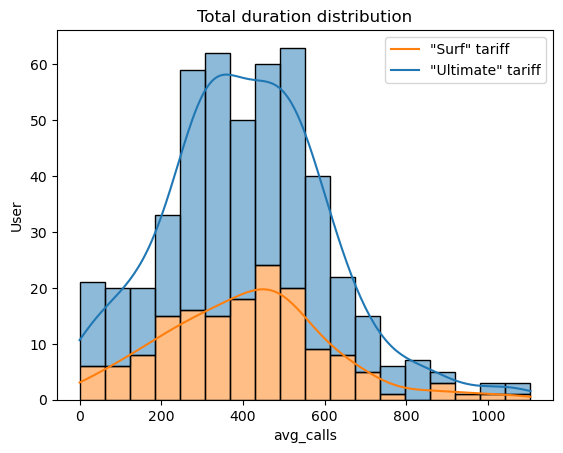

In [57]:
#Creating a histogram of the total number of calls distribution by our users grouped by their tariff plan 
sns.histplot(data=finding_parameters, x='avg_dur', hue='plan', alpha=0.5, multiple='stack', kde=True)
plt.title('Total duration distribution')
plt.legend(['"Surf" tariff','"Ultimate" tariff'])
plt.xlabel('avg_calls')
plt.ylabel('User');


- As we said previously we have a big spread between users' "data". Here we can additionally say that we have right skewed its mean that the "mean" is greater than the "median".

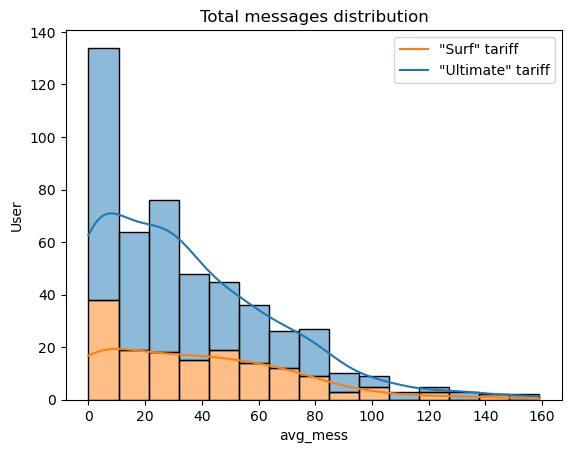

In [58]:
# Creating a histogram of the total number of messages distribution by our users grouped by their tariff plan
sns.histplot(data=finding_parameters, x='avg_mess', hue='plan', alpha=0.5, multiple='stack', kde=True)
plt.title('Total messages distribution')
plt.legend(['"Surf" tariff','"Ultimate" tariff'])
plt.xlabel('avg_mess')
plt.ylabel('User');

- The same distribution as the previous hist has right skewed and big spread of data.

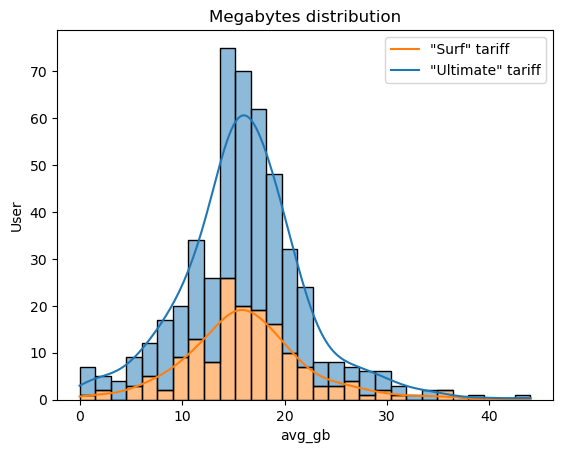

In [59]:
#Creating a histogram of "Traffic" gigabytes distribution by our users grouping by their tariff plan
sns.histplot(data=finding_parameters, x='avg_mb', hue='plan', alpha=0.5, multiple='stack', kde=True)
plt.title('Megabytes distribution')
plt.legend(['"Surf" tariff','"Ultimate" tariff'])
plt.xlabel('avg_gb')
plt.ylabel('User');

> Our histogram has the same way of right-skewed with a big spread of data as the first one. Let's check the last column.

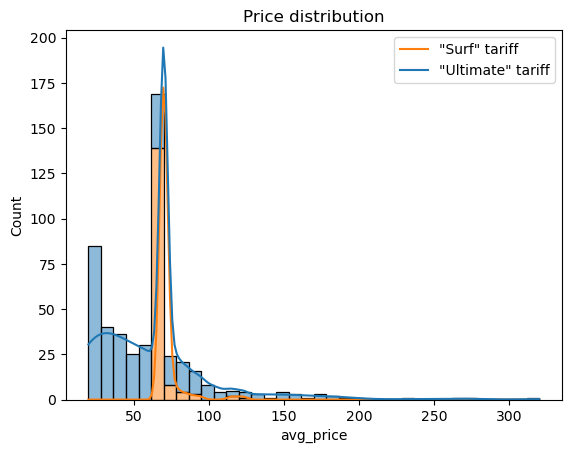

In [60]:
#Creating a histogram of "avg_price"  distribution by our users grouping by their tariff plan
sns.histplot(data=finding_parameters, x='avg_price', hue='plan', alpha=0.5, multiple='stack', kde=True)
plt.title('Price distribution')
plt.legend(['"Surf" tariff','"Ultimate" tariff'])
plt.xlabel('avg_price')
plt.ylabel('Count');

> Conclusion:
- The first histogram total duration distribution we can say that we have Normal Distribution and by this histogram we can say that most of our users require more than 80 minutes  per month 
- The second histogram of total messages per month shows us that it has right skewed which means the users do not usually send a message because in another part they prefer to call or use the internet we can clearly see it in the next histogram
- The third histogram of total gb per month tells us that here we have normal Distribution and each month for the satisfaction of our customers they need around 10 - 20 GB of internet monthly

# Step 4. Test the hypotheses
 -  First hypothesis that we will test is "The average revenue from users of Ultimate and Surf calling plans differs."
 - And The secon is "The average revenue from users in NY-NJ area is different from that of the users from other regions."

Let's start with the first hypothesis "The average revenue from users of Ultimate and Surf calling plans differs." Here we will work with two tail tests:
- Ho: M(surf) = M(ultimate) - means the average revenue from users of Ultimate and Surf calling plans are equal
- Ha: M(surf) != M(ultimate) - means the average revenue from users of Ultimate and Surf calling plans are not equal
> In order to test your hypothesis that the means of the two statistical populations are equal based on samples taken from them, we will apply the method "scipy.stats.ttest_ind".

In [61]:
# Let's create two samples grouping them by individual tariff plan

surf = finding_parameters.query('plan == "surf"')['avg_price']
ultimate = finding_parameters.query('plan == "ultimate"')['avg_price']
alpha=0.05 #confidence level 95%

#test difference of mean of each plan
results = st.ttest_ind(surf, ultimate)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis (revenues from each plan are different)!")
else:
    print("We can't reject the null hypothesis (revenues from each plan are not significantly different)!")

p-value: 0.00012070587350037933
We reject the null hypothesis (revenues from each plan are different)!


- Our hypothesis says that our revenue from each plan is different, this means in the next step let's find out what revenue we will have from each tariff plan

In [62]:
#Ravenue from each tariff plan
surf_ravenue = round(np.mean(surf))
ultimate_ravenue = round(np.mean(ultimate))

print('Ravenue from surf tarrife plan:',surf_ravenue,'USD')
print('Ravenue from ultimate tarrife plan:',ultimate_ravenue,'USD')

Ravenue from surf tarrife plan: 58 USD
Ravenue from ultimate tarrife plan: 72 USD


> Conclusion: Now we can make a conclusion that by calculating revenue we can see that the "ultimate" tariff plan can bring to our mobile operator more money than "surf".


> Step 4.2 Here we will work with another hypothesis "The average revenue from users in NY-NJ area is different from that of the users from other regions."
- Ho: avg_price['NY-NJ'] != avg_price[another_region] ( our Null-hypothesis)
- Ha:  avg_price['NY-NJ'] == avg_price[another_region] ( our Alternative hypothesis)

 - For this task, we will use stem words that will find all users from NY-NJ and will give them some identification number like (1) and these will help us work with them further.

In [63]:
# Creating a stemmer
stemmer = SnowballStemmer('english')


# collect purposes in all rows, and then make a big list containing all words
# go through all words and get their stems. Sort stems according to their frequency with Counter
words =[]
for sentence in finding_parameters['city']:
    word = nltk.word_tokenize(sentence)
    for w in word:
        stemmed = stemmer.stem(w)
        words.append(stemmed)
Counter(words).most_common()
    

[(',', 490),
 ('msa', 490),
 ('citi', 88),
 ('new', 85),
 ('york-newark-jersey', 79),
 ('ny-nj-pa', 79),
 ('ca', 78),
 ('tx', 38),
 ('san', 30),
 ('los', 29),
 ('angeles-long', 29),
 ('beach-anaheim', 29),
 ('fl', 25),
 ('dallas-fort', 20),
 ('worth-arlington', 20),
 ('chicago-naperville-elgin', 19),
 ('il-in-wi', 19),
 ('philadelphia-camden-wilmington', 17),
 ('pa-nj-de-md', 17),
 ('mi', 16),
 ('seattle-tacoma-bellevu', 13),
 ('wa', 13),
 ('atlanta-sandi', 12),
 ('springs-roswel', 12),
 ('ga', 12),
 ('tn', 12),
 ('washington-arlington-alexandria', 11),
 ('dc-va-md-wv', 11),
 ('boston-cambridge-newton', 11),
 ('ma-nh', 11),
 ('miami-fort', 11),
 ('lauderdale-west', 11),
 ('palm', 11),
 ('beach', 11),
 ('az', 11),
 ('francisco-oakland-berkeley', 11),
 ('minneapolis-st.', 11),
 ('paul-bloomington', 11),
 ('mn-wi', 11),
 ('detroit-warren-dearborn', 10),
 ('phoenix-mesa-chandl', 9),
 ('oh', 9),
 ('riverside-san', 9),
 ('bernardino-ontario', 9),
 ('charlotte-concord-gastonia', 8),
 ('nc-sc'

In [64]:
#This function will help us assign a number to the users from NY-NJ and who are from different regions by using stemming word
def proper_value(city):
    stem = []
    words = nltk.word_tokenize(city)
    for word in words:
        stemmed = stemmer.stem(word)
        stem.append(stemmed)
    if 'york-newark-jersey' in  stem:
        return '1'
    return '2'



In [65]:
#Creating a new column "Hyp" - Hypothesis values this column we will need to find a solution for our hypothesi
finding_parameters['Hyp'] = finding_parameters['city'].apply(proper_value)
finding_parameters['Hyp'].unique()

array(['2', '1'], dtype=object)

In [66]:
#Checking how many users we have from NY-NJ
finding_parameters.query('Hyp == "1"')['user_id'].count()

79

In [67]:
#Seems we have only 79 users from this region let's test our hypothesis
NY_NJ = finding_parameters.query('Hyp == "1"')['avg_price']
Other = finding_parameters.query('Hyp == "2"')['avg_price']
alpha=0.05 #confidence level 95%

#test difference of mean of each plan
results = st.ttest_ind(NY_NJ, Other)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis (revenue from users in NY-NJ area is different from that of the users from other regions)!")
else:
    print("We can't reject the null hypothesis (That means, revenues from NY-NJ and other regions are not significantly different!)!")


p-value: 0.4789101699607582
We can't reject the null hypothesis (That means, revenues from NY-NJ and other regions are not significantly different!)!


In [68]:
#Now let's calculate the mean revenue for each of those two region
print('Ravenue from surf tarrife plan:',round(np.mean(NY_NJ)),'USD')
print('Ravenue from ultimate tarrife plan:',round(np.mean(Other)),'USD')

Ravenue from surf tarrife plan: 60 USD
Ravenue from ultimate tarrife plan: 63 USD


# Conclusion:
With 95% confidence, we cannot accept Null-hypothesis that the revenue coming from each plan is equal. By making our calculation we came to the conclusion that on average surf plan, users pay 58 USD per month, while 'ultimate' plan users pay 72 USD per month. However, the number of ultimate plan users is almost two times less than surf plan users. Therefore, we should invest more into an advertisement of the ultimate plan and attract more customers for our more profitable plan. On another hand, the revenue coming from users in NY-NJ was not significantly different from other regions. For now, it is not important to focus on customers from NY-NJ, specifically.